In [10]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor


# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("white")
sns.set_context("poster")

%matplotlib inline
boston = load_boston()

In [11]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [12]:
print boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

We can confirm that the scales for the attributes are different. We have the option of doing a couple of transformation later on

In [14]:
bos_df = pd.DataFrame(boston.data)
bos_df.columns = boston.feature_names
bos_df["PRICE"] = boston.target # lets add the data that we're trying to predict
bos_df.head(15)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [15]:
bos_df.shape

(506, 14)

Here we can look that the min,max and mean values vary alot. We have the option to rescale the data during the modeling phase.

In [16]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
bos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [18]:
set_option('precision' , 3)
print(bos_df.corr(method= 'pearson'))

          CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
CRIM     1.000 -0.199  0.404 -0.055  0.418 -0.220  0.351 -0.378  0.622  0.580   
ZN      -0.199  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   
INDUS    0.404 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721   
CHAS    -0.055 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   
NOX      0.418 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668   
RM      -0.220  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   
AGE      0.351 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506   
DIS     -0.378  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   
RAD      0.622 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910   
TAX      0.580 -0.315  0.721 -0.036  0.668 -0.292  0.506 -0.534  0.910  1.000   
PTRATIO  0.288 -0.392  0.383 -0.122  0.189 -0.356  0.262 -0.232  0.465  0.461   
B       -0.377  0.176 -0.357

Here we can take a look at the features that have strong correlation for example:

RAD      TAX        0.910
NOX      DIS        0.769
INDUS    NOX        0.764
NOX      INDUS      0.764
AGE      DIS        0.748
AGE      NOX        0.731
TAX      INDUS      0.721
DIS      INDUS      0.708

In [19]:
c = bos_df.corr().abs()
show = c.unstack()
topc = show.sort_values(ascending=False)
topc.head(30)

PRICE    PRICE      1.000
LSTAT    LSTAT      1.000
ZN       ZN         1.000
INDUS    INDUS      1.000
CHAS     CHAS       1.000
NOX      NOX        1.000
RM       RM         1.000
AGE      AGE        1.000
DIS      DIS        1.000
RAD      RAD        1.000
TAX      TAX        1.000
PTRATIO  PTRATIO    1.000
B        B          1.000
CRIM     CRIM       1.000
RAD      TAX        0.910
TAX      RAD        0.910
NOX      DIS        0.769
DIS      NOX        0.769
INDUS    NOX        0.764
NOX      INDUS      0.764
AGE      DIS        0.748
DIS      AGE        0.748
LSTAT    PRICE      0.738
PRICE    LSTAT      0.738
AGE      NOX        0.731
NOX      AGE        0.731
TAX      INDUS      0.721
INDUS    TAX        0.721
DIS      INDUS      0.708
INDUS    DIS        0.708
dtype: float64

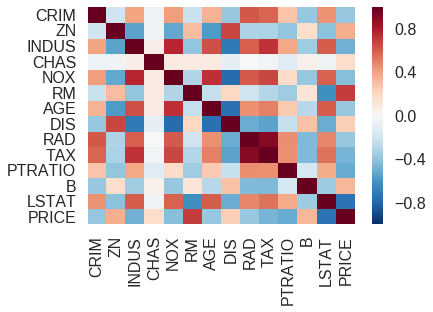

In [20]:
sns.heatmap(bos_df.corr());

Here we can see that some features have an exponential distribution (B,AGE,CRIM,ZN) and other graphs have a bimodial distribution (TAX, RAD). 

It looks like NOX, RM and LSTAT have skewed Gaussian distributions. (Might need some data transformations)

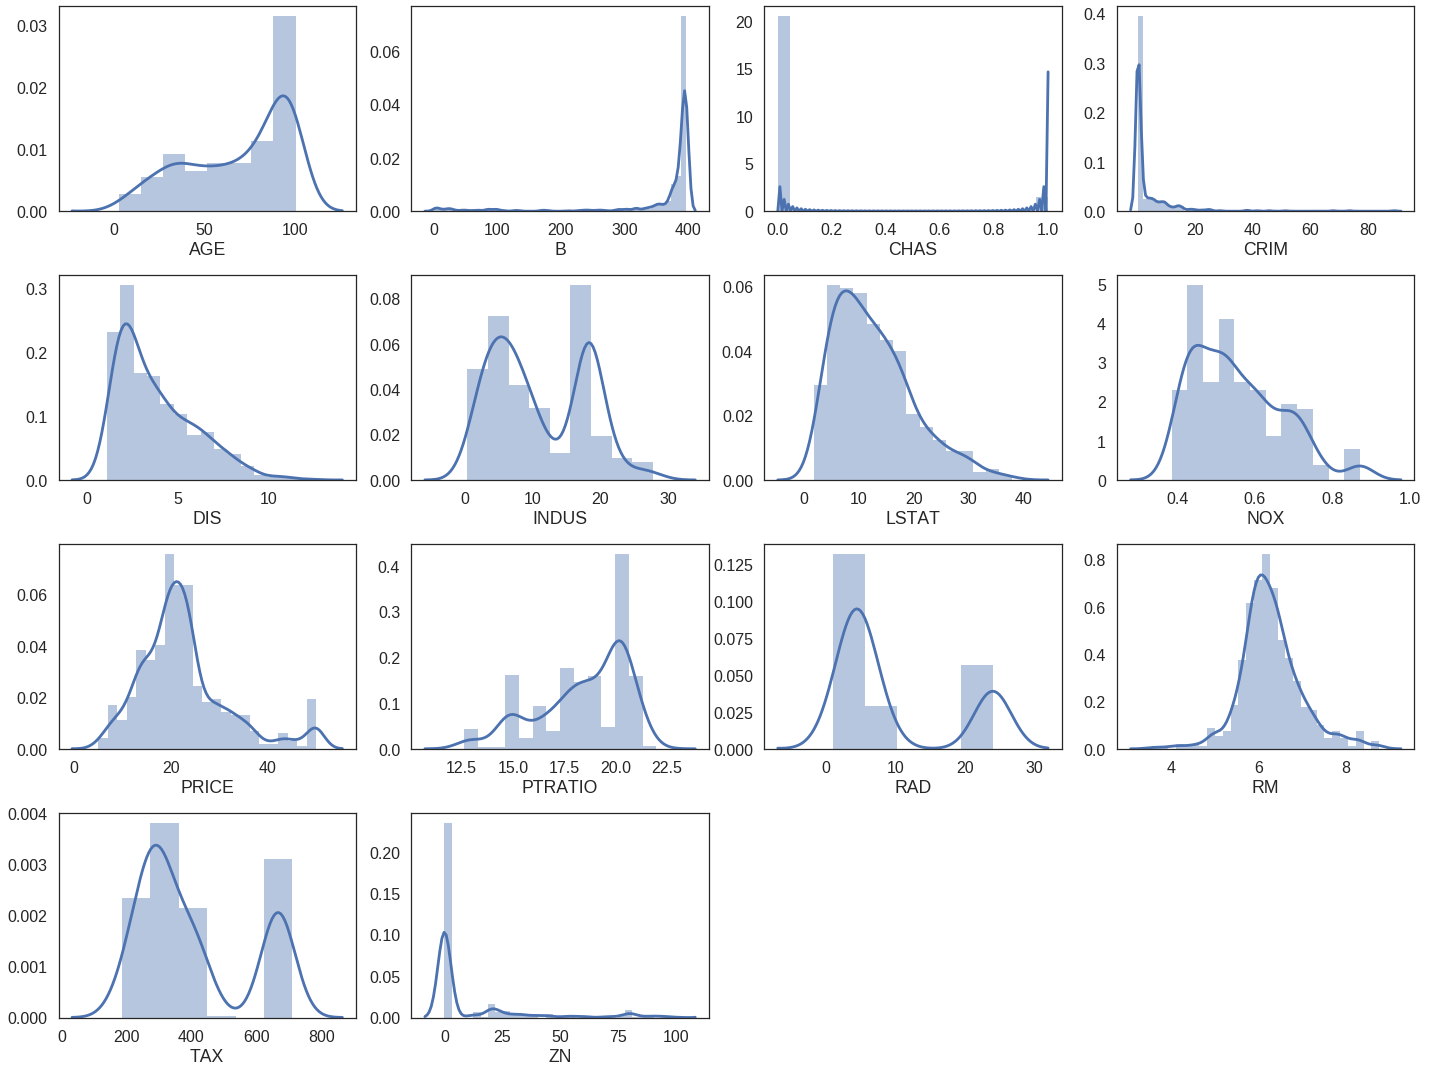

In [21]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,15))
sns.distplot(bos_df.AGE, ax=axs[0,0])
sns.distplot(bos_df.B, ax=axs[0,1])
sns.distplot(bos_df.CHAS, ax=axs[0,2])
sns.distplot(bos_df.CRIM, ax=axs[0,3])
sns.distplot(bos_df.DIS, ax=axs[1,0])
sns.distplot(bos_df.INDUS, ax=axs[1,1])
sns.distplot(bos_df.LSTAT, ax=axs[1,2])
sns.distplot(bos_df.NOX, ax=axs[1,3])
sns.distplot(bos_df.PRICE, ax=axs[2,0])
sns.distplot(bos_df.PTRATIO, ax=axs[2,1])
sns.distplot(bos_df.RAD, ax=axs[2,2])
sns.distplot(bos_df.RM, ax=axs[2,3])
sns.distplot(bos_df.TAX, ax=axs[3,0])
sns.distplot(bos_df.ZN, ax=axs[3,1])
axs[-1, -1].axis('off')
axs[-1, -2].axis('off')

fig.tight_layout()


The boxplot helps point out the skew of several distributions

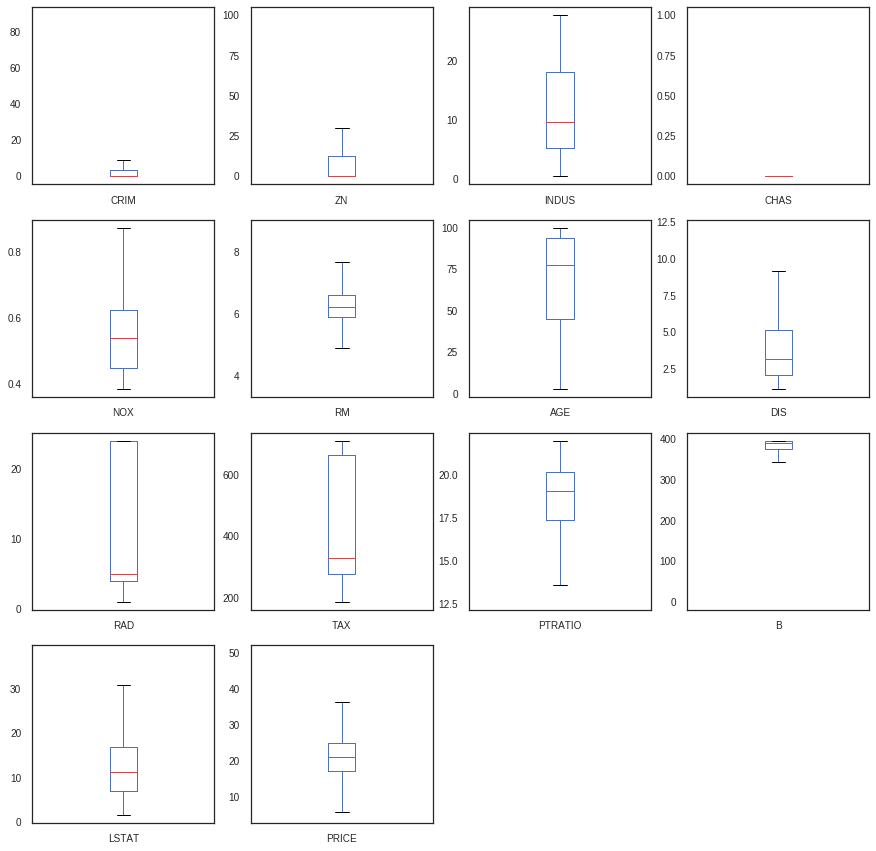

In [22]:
bos_df.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize=(15,15) );

Ideas worth trying to improve model accuracy

* Removing most correlated features
* Normalizing to reduce the effect of differing scales
* Standardizing the datset to reduce the effects of differing distributions (means and standard deviations)

## Evalute Algorithms

#### Validation Hold-out Set

In [23]:
array = bos_df.values
X = array[:,0:13]
Y = array[:,13]
val_size = .20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=val_size, random_state=seed)

We're not sure which algorithm will perform best. I'll test the training set on 3 algorithms and use 10 fold cross validation.

Let's evaluate the regression using Mean Squared Error MSE

In [24]:
num_folds = 10
seed = 7
sco_MSE = 'neg_mean_squared_error'

The 3 algorithms we're going to use are: Linear Regression (LR), Lasso Regression (LASSO) and K-Nearest Neighbors (KNN)

In [25]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('KNN', KNeighborsRegressor()))

The algorithms all have the default tuning parameters. Let's compare them and display the mean and standard deviation of MSE for each algorithm

In [26]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv =kfold, scoring=sco_MSE)
    results.append(cv_results)
    names.append(name)
    print "{:s}: {:f} {:f}".format(name, cv_results.mean(), cv_results.std())

LR: -21.400099 9.390450
LASSO: -26.431547 11.655308
KNN: -41.896488 13.901688


From the box plots below we can see that LR and LASSO are performing well. Differing scales of the data is probably hurting the algorithms

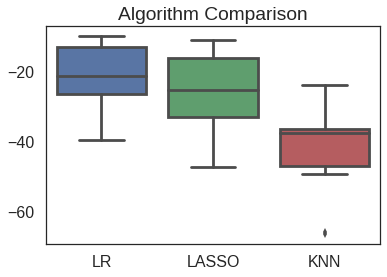

In [27]:
g = sns.boxplot(data=results)
g.axes.set_title('Algorithm Comparison')
g.axes.set_xticklabels(names);

#### Evaluating Algorthims with Standardization

We assume that differing scales of the raw data may be negatively impacting the algorithms. Let's re-evaluate the algorithms by transforming our data such that each attribute has a mean value of 0 and a standard deviation of 1.

Here we'll use the Pipeline utility to help automate machine learning workflows

In [28]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))


In [29]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=sco_MSE)
    results.append(cv_results)
    names.append(name)
    print "{:s}: {:f} {:f}".format(name, cv_results.mean(), cv_results.std())

ScaledLR: -21.400099 9.390450
ScaledLASSO: -26.602585 8.972576
ScaledKNN: -20.123490 12.373834


In [30]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=sco_MSE)
    results.append(cv_results)
    names.append(name)
    print "{:s}: {:f} {:f}".format(name, cv_results.mean(), cv_results.std())

ScaledLR: -21.400099 9.390450
ScaledLASSO: -26.602585 8.972576
ScaledKNN: -20.123490 12.373834


Scaling had a major effect on KNN.

On the boxplots we can see that KNN distribution of MSE error and has the lowest score

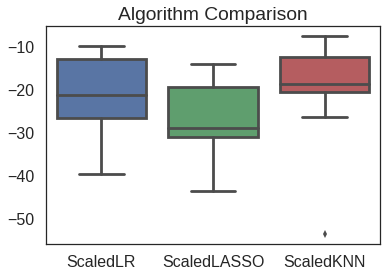

In [31]:
gs = sns.boxplot(data=results)
gs.axes.set_title('Algorithm Comparison')
gs.axes.set_xticklabels(names);

#### Improve KNN Results with hyperparameter tuning

Now that we know that KNN has a good performance with a scaled version of the dataset, we can improve the model by the process of hyperparameter tuning. We can use grid search to try different numbers of neighbors and see if we can improve the score. 

In [32]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = range(1,22,2) # 1 - 21 odd values
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=sco_MSE, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [33]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means,stds,params):
    print "mean:{:f} stdev:{:f} {}".format(mean, std, param)

mean:-20.373936 stdev:15.036687 {'n_neighbors': 1}
mean:-18.133171 stdev:12.958886 {'n_neighbors': 3}
mean:-20.139550 stdev:12.199280 {'n_neighbors': 5}
mean:-20.560152 stdev:12.348131 {'n_neighbors': 7}
mean:-20.382691 stdev:11.617326 {'n_neighbors': 9}
mean:-21.052064 stdev:11.621184 {'n_neighbors': 11}
mean:-21.157689 stdev:11.938415 {'n_neighbors': 13}
mean:-21.538655 stdev:11.532863 {'n_neighbors': 15}
mean:-22.796125 stdev:11.605158 {'n_neighbors': 17}
mean:-23.885472 stdev:11.362449 {'n_neighbors': 19}
mean:-24.364986 stdev:11.920959 {'n_neighbors': 21}


In [34]:
print "Best score:{:f} using {}".format(grid_result.best_score_, grid_result.best_params_)

Best score:-18.133171 using {'n_neighbors': 3}


Now that we know the best parameter for our model, we can create a model with k=3 and evaluate it on our hold out set

In [35]:
# Prepare Model
model = KNeighborsRegressor(n_neighbors=3)
model.fit(rescaledX,Y_train)
# Transform the Validation dataser
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print (mean_squared_error(Y_validation, predictions))

33.2668954248


Here we can notice that there's a big difference between the training error and the validation error. Training MSE is 18.13 and the hold-out validation MSE is 33.27 . We can try to reduce some features. 

Before we make such decision let's try ensemble methods and see if that improves the accuracy. 

Ensemble learning (or "ensembling") is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model.

In [36]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGMB', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))

In [37]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=sco_MSE)
    names.append(name)
    print '{} {} {}'.format(name, cv_results.mean(), cv_results.std())

ScaledAB -15.4951825789 6.70081454138
ScaledGMB -9.46986035169 4.24835240085
ScaledRF -13.1177241829 6.39344871236


Tune gradient boosting ensemble to improve performance

The default number of boosting stages to perform is 100. Often, the larger the number of boosting stages, the better the performance but the longer the training time. (kfold = 10)

In [38]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators = range(50,401,50))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=sco_MSE, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [39]:
grid_result.best_score_, grid_result.best_params_

(-9.0611604103426995, {'n_estimators': 250})

#### Finalizing model

In [40]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=250)
model.fit(rescaledX,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

In [41]:
rescaledValidationX = scaler.transform(X_validation)
pred = model.predict(rescaledValidationX)
print mean_squared_error(Y_validation, pred)

11.9601112194


We can see that our mean square error is 11.96 and is fairly close to our estimate 9.06